<a href="https://colab.research.google.com/github/Rocklucca32/Facul/blob/main/PROGRAMA%C3%87%C3%83O_ORIENTADA_A_OBJETOS_PARA_DADOS_unidade_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import make_classification
# Gerar dataset
X, y = make_classification(
n_samples=1000, n_features=10, n_informative=5, n_redundant=2,
random_state=42, n_classes=2
)
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)
print(f"Treino: {X_train.shape}, Teste: {X_test.shape}")

Treino: (700, 10), Teste: (300, 10)


In [ ]:
# Treinamento de um modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
# Previsões e probabilidades
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

AUC: 0.99


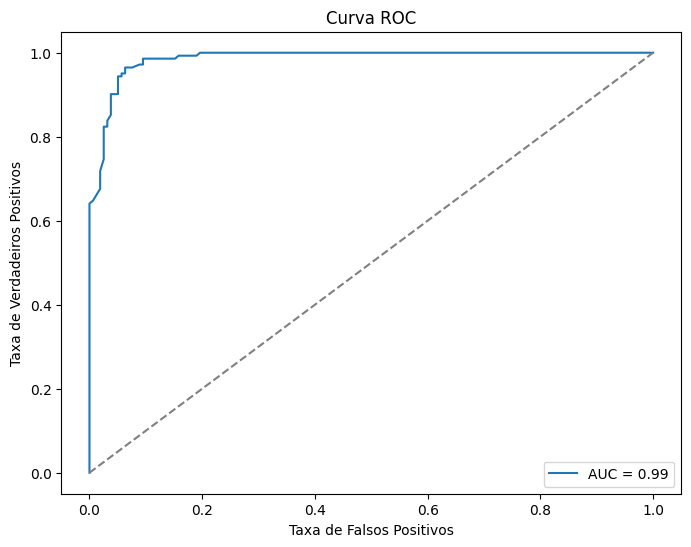

In [ ]:
# Calcular AUC
auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc_score:.2f}")
# Plotar a Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()

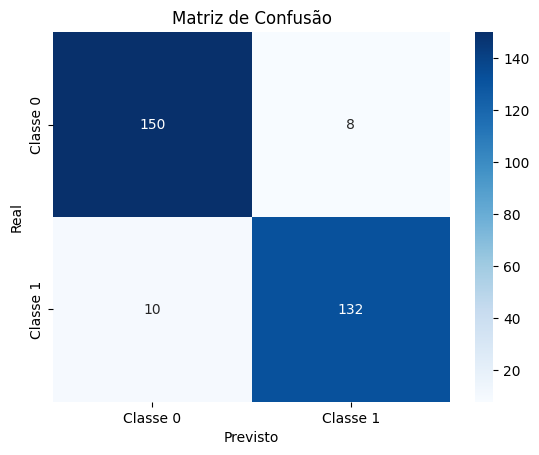

In [ ]:
# Construção da Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

In [ ]:
# Relatório de Classificação
report = classification_report(y_test, y_pred, target_names=["Classe 0","Classe 1"])
print(report)

              precision    recall  f1-score   support

    Classe 0       0.94      0.95      0.94       158
    Classe 1       0.94      0.93      0.94       142

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [ ]:
thresholds = np.arange(0.1, 1.0, 0.1)
for threshold in thresholds:y_pred_threshold = (y_proba >= threshold).astype(int)
print(f"Threshold: {threshold:.1f}")
print(confusion_matrix(y_test, y_pred_threshold))
print(classification_report(y_test, y_pred_threshold,target_names=["Classe 0", "Classe 1"]))
print("-" * 50)

Threshold: 0.9
[[158   0]
 [ 79  63]]
              precision    recall  f1-score   support

    Classe 0       0.67      1.00      0.80       158
    Classe 1       1.00      0.44      0.61       142

    accuracy                           0.74       300
   macro avg       0.83      0.72      0.71       300
weighted avg       0.82      0.74      0.71       300

--------------------------------------------------
